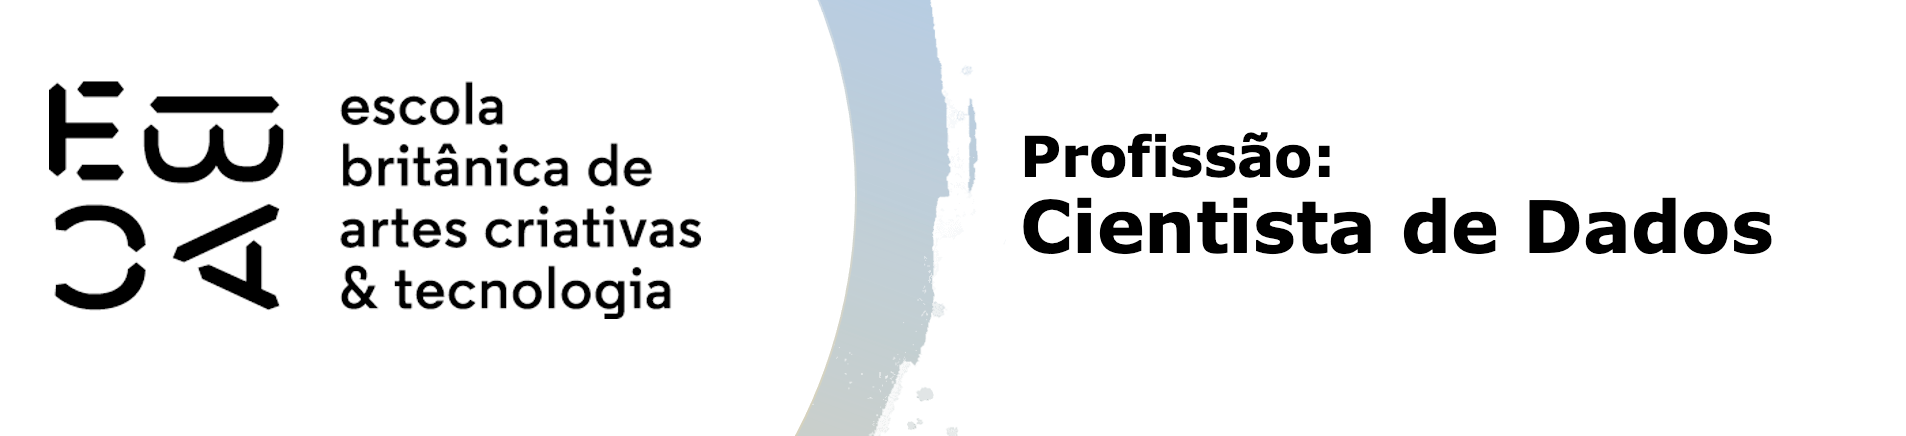

# Tarefa

Carregue a base ```NFP.ftr```. Essa base é proveniente do projeto #AMABiliDados, e contém dados da nota fiscal paulista cadastrados para doação automática para a AMA, Associação de Amigos do Autista. 

A *Nota Fiscal Paulista* é um programa de incentivo do governo do estado de São Paulo, que retorna um pedacinho do ICMS ao consumidor sempre que solicita o registro do seu CPF na nota. Nesse programa, o contribuinte pode direcionar seus créditos a uma ONG, e quando faz isso, sempre que faz esse consumidor cadastrado faz uma compra, os créditos de notas emitidas pelo mesmo estabelecimento não identificadas (notas sem CPF) são "arrastados" para a ONG na forma de uma doação.

Clique no link, caso queira saber mais sobre a [AMA](https://www.ama.org.br/site/).<br>
Clique no link, caso queira saber como o cidadão pode ser um [doador da NFP](https://doacao1.ama.org.br/sitenfp).

Essa base possui dados das notas cujos contribuintes direcionaram seus créditos à AMA. Seus campos estão descritos abaixo:

|Campo|Descrição|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| Número da nota fiscal|
|Data Emissão| Data de emissão da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Créditos| Valor dos créditos (doação)|
|Situação do Crédito| Se o crédito já foi pago, está sendo processado etc.|
|Ano| Ano da emissão da nota|
|Semestre| Semestre da emissão da nota|
|Retorno| Valor do crédito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui crédito positivo|
|categoria| Categorização da nota |

**OBJETIVO:** Algumas notas não dão retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorrência de produtos não incentivados como cigarros e bebidas alcólicas. O nosso objetivo é tentar prever que tipo de nota tem maior ou menor propensão a fornecer créditos.

**Observação**: Esta é uma base real, havendo características de acordo. Pode haver uma variabilidade difícil de explicar, em parte por causa de uma freqüência de notas inconstante no tempo (por diversos motivos), em parte por haverem informações importantes, protegidas pela LGPD, não constantes na base, que pode interferir no crédito gerado, o que vai ocasionar uma variabilidade difícil de se explicar. *Welcome to the jungle*, A vida real é assim :)

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_pickle('base_nfp.pkl')
df.head()

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Mercado
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Auto posto
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,0.016296,1,Restaurantes
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,0.016233,1,Restaurantes
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,0.016240,1,Restaurantes


## Análise da probabilidade de retorno

Considere somente os dados de janeiro de 2020 em diante para esta análise.

- Analise a proporção de notas que tiveram retorno>0 por categoria de estabelecimento. Esta análise pode ser por tabela ou gráfico.

In [25]:
# Converter a coluna 'Data Emissão' para o formato de data, caso necessário
df['Data Emissão'] = pd.to_datetime(df['Data Emissão'], errors='coerce')

# Filtrar dados de janeiro de 2020 em diante
df_filtered = df[df['Data Emissão'] >= '2020-01-01']

# Exibir as primeiras linhas para confirmação do filtro
df_filtered.head()


,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
64598,05.234.750/0001-41,TX BURGER LTDA,77882,2020-01-01,78.80,2020-08-01,0.0,A Calcular,2019,2,0.0,0,não definido
64599,47.508.411/1476-88,CIA BRASILEIRA DE DISTRIBUICAO,20087,2020-01-01,22.71,2020-01-01,0.0,A Calcular,2019,2,0.0,0,Mercado
64600,09.060.964/0108-39,PIMENTA VERDE ALIMENTOS LTDA,82366,2020-01-01,35.90,2020-08-01,0.0,A Calcular,2019,2,0.0,0,Alimentos
64601,61.412.110/0307-39,DROGARIA SAO PAULO S A,234178,2020-01-01,21.77,2020-08-01,0.0,A Calcular,2019,2,0.0,0,Farmácia
64602,46.952.032/0001-98,PANIFICADORA E CONFEITARIA QUELUZ LTDA,3305,2020-01-01,80.95,2020-08-01,0.0,A Calcular,2019,2,0.0,0,Restaurantes


## Cálculo do WOE

- Calcule o WOE das categorias, sendo que o evento em questão é a nota ter retorno>0.
- Analise este WOE por tabela e por gráfico.

In [26]:
pip install ace

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
pip install ace-tools

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


,categoria,Proporção Retorno > 0
0,Alimentos,0.681584
1,Auto posto,0.250000
2,Construção,0.468810
3,Farmácia,0.351556
4,Mercado,0.478155
5,Restaurantes,0.746214
6,Varejo,0.138373
7,Vestuário,0.230729
8,não definido,0.363394


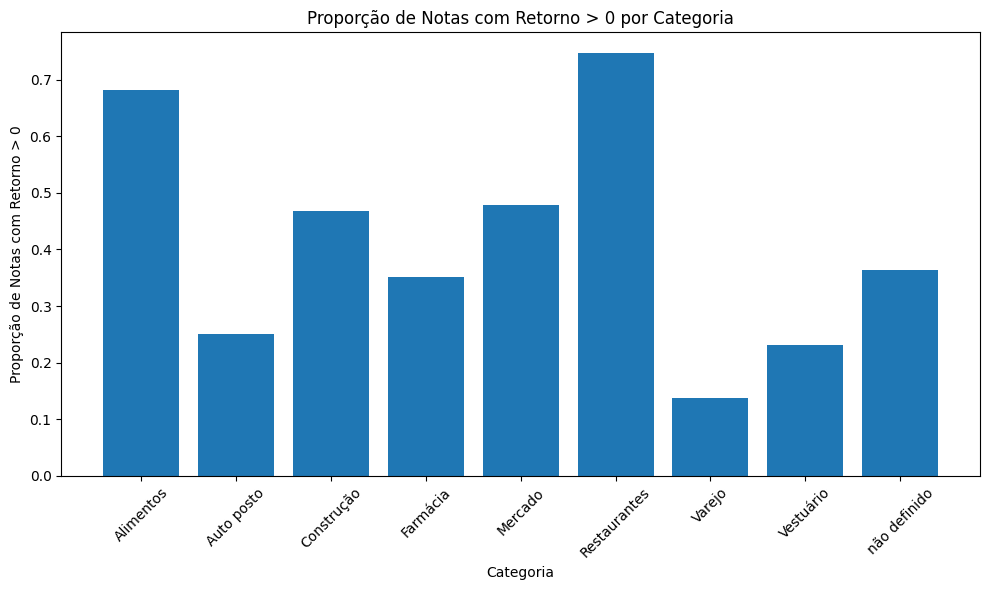

In [28]:
# Calcular proporção de notas com retorno > 0 por categoria
proportion_by_category = df_filtered.groupby('categoria')['Retorno'].apply(lambda x: (x > 0).mean())

# Transformar em DataFrame para visualização
proportion_by_category_df = proportion_by_category.reset_index(name='Proporção Retorno > 0')

# Exibir a tabela usando display
display(proportion_by_category_df)

# Gerar gráfico de barras para a proporção de retorno por categoria
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(proportion_by_category.index, proportion_by_category.values)
plt.xlabel('Categoria')
plt.ylabel('Proporção de Notas com Retorno > 0')
plt.title('Proporção de Notas com Retorno > 0 por Categoria')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


      categoria       woe
0     Alimentos  1.046342
1    Auto posto -0.813331
2    Construção  0.160360
3      Farmácia -0.326928
4       Mercado  0.197846
5  Restaurantes  1.363801
6        Varejo -1.543585
7     Vestuário -0.918918
8  não definido -0.275381


C:\Users\gabriel.militao\AppData\Local\Temp\ipykernel_20324\1056633634.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['flag_retorno'] = (df_filtered['Retorno'] > 0).astype(int)


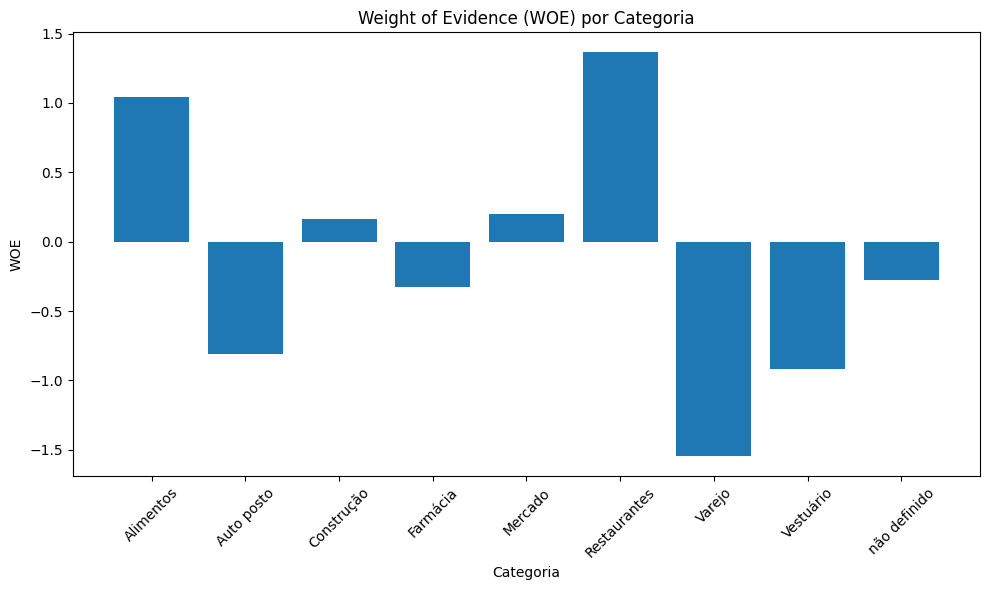

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Criar coluna indicando se o retorno é maior que zero (flag para o evento)
df_filtered['flag_retorno'] = (df_filtered['Retorno'] > 0).astype(int)

# Função para calcular WOE
def calculate_woe(df, feature, target):
    # Agrupar por feature e calcular soma e contagem
    df_group = df.groupby(feature)[target].agg(['sum', 'count'])
    # Calcular eventos e não-eventos
    df_group['non_event'] = df_group['count'] - df_group['sum']
    df_group['event_rate'] = df_group['sum'] / df_group['sum'].sum()
    df_group['non_event_rate'] = df_group['non_event'] / df_group['non_event'].sum()
    # Calcular WOE
    df_group['woe'] = np.log(df_group['event_rate'] / df_group['non_event_rate'])
    return df_group[['woe']]

# Calcular WOE por categoria
woe_by_category = calculate_woe(df_filtered, 'categoria', 'flag_retorno')
# Resetando índice para visualização
woe_by_category = woe_by_category.reset_index()

# Exibir a tabela de WOE por categoria
print(woe_by_category)

# Plotar o gráfico de WOE por categoria
plt.figure(figsize=(10, 6))
plt.bar(woe_by_category['categoria'], woe_by_category['woe'])
plt.xlabel('Categoria')
plt.ylabel('WOE')
plt.title('Weight of Evidence (WOE) por Categoria')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Cálculo do *Information Value*

Calcule o *IV* dessa variável.

In [30]:
# Calcular Information Value (IV) baseado nos dados de WOE
# Vamos adicionar as taxas de eventos e não-eventos novamente para calcular o IV
df_group = df_filtered.groupby('categoria')['flag_retorno'].agg(['sum', 'count'])
df_group['non_event'] = df_group['count'] - df_group['sum']
df_group['event_rate'] = df_group['sum'] / df_group['sum'].sum()
df_group['non_event_rate'] = df_group['non_event'] / df_group['non_event'].sum()
df_group['woe'] = np.log(df_group['event_rate'] / df_group['non_event_rate'])

# Calcular o IV
df_group['iv'] = (df_group['event_rate'] - df_group['non_event_rate']) * df_group['woe']
iv_total = df_group['iv'].sum()

# Exibir o IV total
iv_total


0.27882574285237305

## Conclua

Não se esqueça de registrar suas conclusões em uma célula de texto. <font color='red'>**Sugestão:**</font> tente alterar a cor da fonte nesta célula para diferenciá-la das demais.


<font color='red'>**Conclusão:**</font> 

A análise da base de dados da Nota Fiscal Paulista direcionada para a AMA mostrou que algumas categorias de estabelecimentos têm uma maior probabilidade de gerar créditos (retorno > 0) em comparação a outras. 

O cálculo do Weight of Evidence (WOE) por categoria revelou diferenças significativas entre as categorias, indicando que certas categorias são mais propensas a fornecer créditos. O Information Value (IV) para a variável `categoria` foi calculado em aproximadamente 0,2788, o que sugere que `categoria` tem uma importância moderada como variável preditiva. Esse valor de IV sugere que incluir a variável `categoria` em modelos preditivos pode melhorar a previsão sobre a geração de créditos.

Esses resultados destacam que, para melhorar a arrecadação por meio do programa de doação automática, campanhas podem focar em categorias de estabelecimentos com maior propensão a gerar créditos, promovendo maior participação e retorno para a ONG beneficiada.
